In [1]:
# Data Handling and File Uploads
import pandas as pd
from google.colab import files

# Data Visualization
import matplotlib.pyplot as plt

# Hierarchical Clustering Tools
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [2]:
uploaded = files.upload()

# Get the filename to read it into pandas
file_name = list(uploaded.keys())[0]

# Load the dataset
df = pd.read_csv(file_name)

Saving Mall_Customers.csv to Mall_Customers.csv


In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']].values

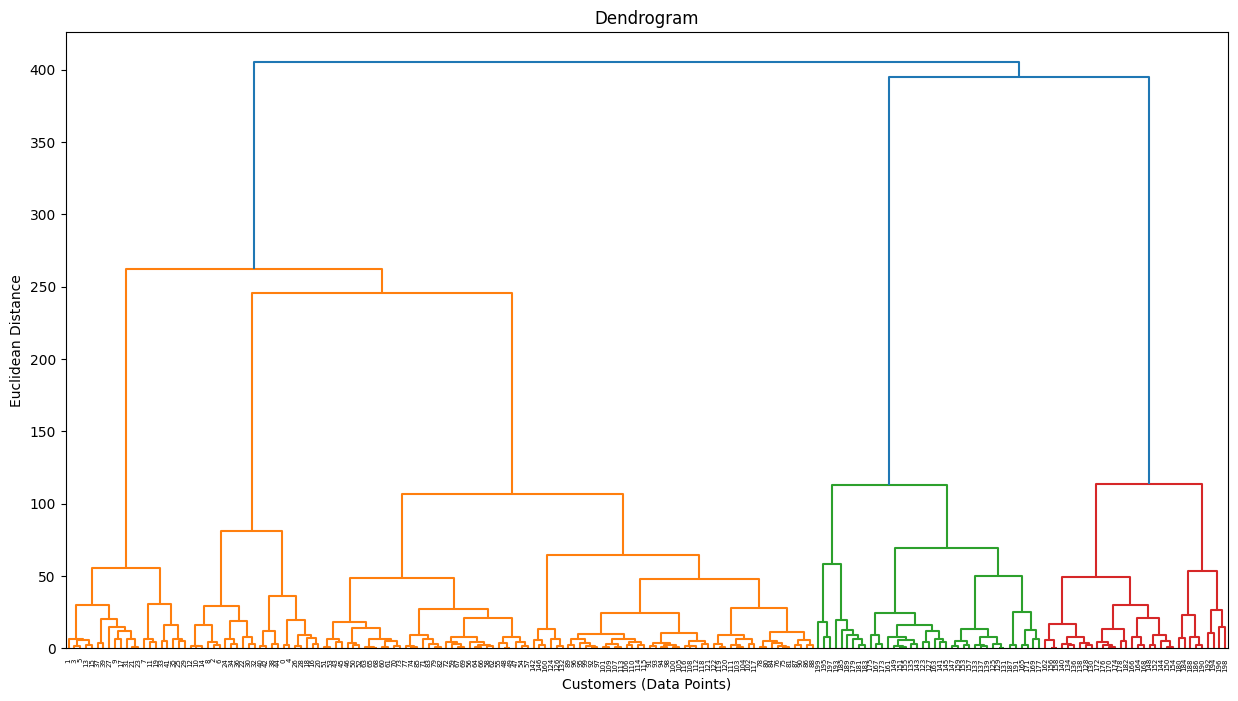

In [ ]:
plt.figure(figsize=(15, 8))

# The sch.linkage function performs the hierarchical clustering.
# We pass our data 'X' and the method 'ward'.
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))

plt.title('Dendrogram')
plt.xlabel('Customers (Data Points)')
plt.ylabel('Euclidean Distance')
plt.grid(False) # Grid is usually off for dendrograms
plt.show()

In [ ]:
# Create the model object
# We specify the number of clusters, the distance metric ('euclidean'),
# and the linkage method ('ward').
hc_model = AgglomerativeClustering(n_clusters=5, linkage='ward')

# Fit the model and get the cluster labels for each data point
y_hc = hc_model.fit_predict(X)

# Let's see the cluster assignments for the first 10 customers
print("Cluster assignments for the first 10 customers:")
print(y_hc[:10])

Cluster assignments for the first 10 customers:
[4 3 4 3 4 3 4 3 4 3]


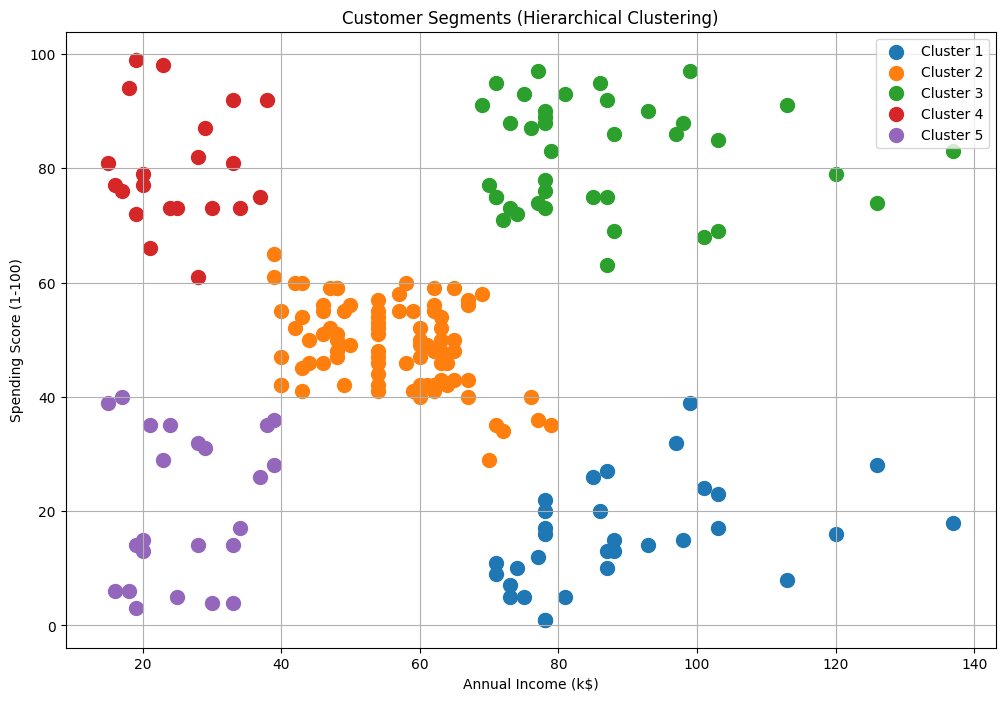

In [ ]:
# Cell 6: Visualizing the Clusters

plt.figure(figsize=(12, 8))

# Create a scatter plot for each of the 5 clusters
# We filter our data 'X' based on the cluster assignments in 'y_hc'
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s=100, label='Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s=100, label='Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s=100, label='Cluster 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s=100, label='Cluster 4')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s=100, label='Cluster 5')

plt.title('Customer Segments (Hierarchical Clustering)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid(True)
plt.show()